<a href="https://colab.research.google.com/github/jmbaek/NLP_applications/blob/main/PretrainingBERT_PythonCodeTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 9.1 MB/s 
     |████████████████████████████████| 462 kB 50.5 MB/s 


In [2]:
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [26]:
bert_preprocess = hub.KerasLayer(preprocess_url)

In [27]:
text_test = ['that was a nice movie indeed', 'I love python programming']
text_processed = bert_preprocess(text_test)
text_processed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [6]:
text_processed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  2008,  2001,  1037,  3835,  3185,  5262,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [28]:
bert_encoder = hub.KerasLayer(encoder_url)
bert_results = bert_encoder(text_processed)
bert_results.keys()

dict_keys(['default', 'encoder_outputs', 'pooled_output', 'sequence_output'])

In [29]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.08247545, -0.02013815,  0.14680883, ..., -0.05504194,
          0.21207508,  0.11869051],
        [-0.46663198, -0.24285477, -0.3423316 , ..., -0.2831246 ,
          1.3741698 ,  0.19046658],
        [-0.27740252, -0.57036436,  0.24329393, ...,  0.23598474,
          0.2682978 ,  0.26211837],
        ...,
        [ 0.17072722,  0.01922826,  0.5363991 , ...,  0.24514116,
          0.2635091 , -0.04776914],
        [ 0.21648622,  0.04456874,  0.547078  , ...,  0.2789396 ,
          0.2860774 , -0.07193862],
        [ 0.08261422,  0.07403944,  0.5833179 , ...,  0.26967448,
          0.19498406, -0.02856611]],

       [[-0.07900561,  0.36335143, -0.21101603, ..., -0.17183733,
          0.16299734,  0.6724263 ],
        [ 0.27883607,  0.43716288, -0.35764828, ..., -0.0446361 ,
          0.38315198,  0.58879817],
        [ 1.2037672 ,  1.0727026 ,  0.4840874 , ...,  0.24921   ,
          0.40730882,  0.4048173 ],
        ...,

In [30]:
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

## Spam detection

In [10]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Copy the API command from kaggle
!kaggle datasets download -d venky73/spam-mails-dataset
!unzip -q /content/spam-mails-dataset.zip -d data

  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 145MB/s]


In [12]:
import tensorflow as tf
import tensorflow_hub as hup
import tensorflow_text as text
import pandas as pd

In [14]:
df = pd.read_csv("data/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
df.groupby('label').describe()

Unnamed: 0                                                         \
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [17]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [125]:
!pip install nltk

In [127]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [129]:
#data_text_processing_stage_
for index, row in df.iterrows():
    if type(row['text']) is str:
        txt_preprocessing(row['text'], index, 'text', df)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attached fi...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject indian springs deal book teco pvr reve...,0


## prep for training

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'],df['spam'], stratify=df['spam'])

In [132]:
x_train.head()

1262    subject best free adult personals searching be...
2105    subject meter 980070 daren meter recorded flow...
636     subject duke cashout entries 7 00 8 00 cashout...
3380    subject ethane election september 2000 fyi for...
4       subject indian springs deal book teco pvr reve...
Name: text, dtype: object

## BERT

In [133]:
def get_sentence_embeding(sentence):
  preprocessed_text = bert_preprocess(sentence)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
  "500$ discount. hurry up",
  "Jongmin, are you up for a tennis game tomorrow?"                       
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132725 , -0.88845736, ..., -0.7474887 ,
        -0.75314736,  0.91964495],
       [-0.88194007, -0.53932995, -0.9742502 , ..., -0.90923846,
        -0.76439774,  0.8939404 ]], dtype=float32)>

In [134]:
e = get_sentence_embeding([
  "I ate a banana this morning",
  "This is a good season for grape",
  "mango is tasty",
  "jeff bazos is a CEO of Amazon",
  "elon musk is a funny guy",
  "my name is jongmin baek and I live in Cary, NC"
])

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[5]])

array([[0.59679914]], dtype=float32)

## Build a Functional model with BERT encoding


In [136]:
from tensorflow.python.util.lazy_loader import LazyLoader
# Bert_Layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network Layers
#########################################################################
layer = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[layer])
#########################################################################


In [137]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                   

In [138]:
METRICS = [
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
 68/122 [===============>..............] - ETA: 12s - loss: 0.5386 - accuracy: 0.7316 - precision: 0.6434 - recall: 0.1472

In [113]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 6s 226ms/step - loss: 0.6544 - accuracy: 0.6253 - precision: 0.6754 - recall: 0.4827


[0.6543625593185425,
 0.625333309173584,
 0.6753731369972229,
 0.48266667127609253]

In [73]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [74]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

Text(33.0, 0.5, 'Truth')

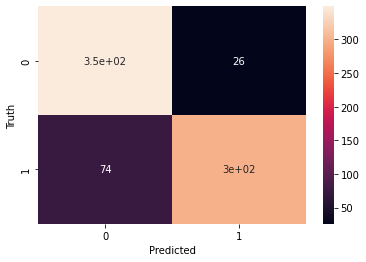

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn 

cm = confusion_matrix(y_test, y_predicted)
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       375
           1       0.92      0.80      0.86       375

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



In [81]:
my_email = [
  'Enter a chance to win $50000, hurry up, offer valid until march 31, 2022',
  'You are awarded a SiPix Digital Camera, call 9192883999 from landline. Delivery within 14 days',
  'Hey Sam, Are you coming for a tennis game tomorrow?',
  "Why don't you wait 'til at least next Monday to see if you win."
]
model.predict(my_email)

array([[0.5593731 ],
       [0.43812934],
       [0.7940746 ],
       [0.60623425]], dtype=float32)